In [139]:
from os import walk
testpath = 'imagens_vq/teste'
# testimgs = next(walk(testpath), (None, None, []))[2]
testimgs = ["lena.easy.pgm"]
encpath = 'imagens_vq/enc'
encimgs = next(walk(encpath), (None, None, []))[2]
decpath = 'imagens_vq/dec'
decimgs = next(walk(decpath), (None, None, []))[2]

In [140]:
testimgs

['lena.easy.pgm']

In [141]:
imgsizes = [512*512]

In [142]:
lambdas = [800, 400, 50, 10]

In [143]:
encimgs_l = []
decimgs_l = []

for l in lambdas:
    temp = []
    for img in encimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-8].replace("t", "0")
        if(l == float(img_l.replace("x", "0"))):
            temp.append(img)
    encimgs_l.append(temp)
    
    temp = []
    for img in decimgs:
        spl = img.split("_")
        last = spl[len(spl) - 1]
        img_l = last[:len(last)-8].replace("p", "0")
        if(l == float(img_l.replace("g", "0"))):
            temp.append(img)
    decimgs_l.append(temp)
        

In [144]:
import os
import numpy as np

compressions = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        orig_size = os.path.getsize(testpath + "/" + testimgs[img])
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])
        temp.append(orig_size/enc_size)
    compressions.append(np.mean(temp))    

In [145]:
compressions

[35.11841929002009, 30.533310039599346, 14.751237902318254, 6.480742608523682]

In [146]:
import os

Rs = []
AllRs = []

for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        enc_size = os.path.getsize(encpath + "/" + encimgs_l[l][img])*8
        R = enc_size/imgsizes[img]
        temp.append(R)
    AllRs.append(temp)
    Rs.append(np.mean(temp)) 
AllRs = np.array(AllRs)

In [147]:
import cv2
PSNRs = []
AllPSNR = []
for l in range(0, len(lambdas)):
    temp = []
    for img in range(0, len(testimgs)):
        img1 = cv2.imread(testpath + "/" + testimgs[img])
        img2 = cv2.imread(decpath + "/" + decimgs_l[l][img])
#         print(testpath + "/" + testimgs[img])
#         print(decpath + "/" + decimgs_l[l][img])
        psnr = cv2.PSNR(img1, img2)
    #         print(psnr)
        temp.append(psnr)
    AllPSNR.append(temp)
    PSNRs.append(np.mean(temp))
AllPSNR = np.array(AllPSNR)

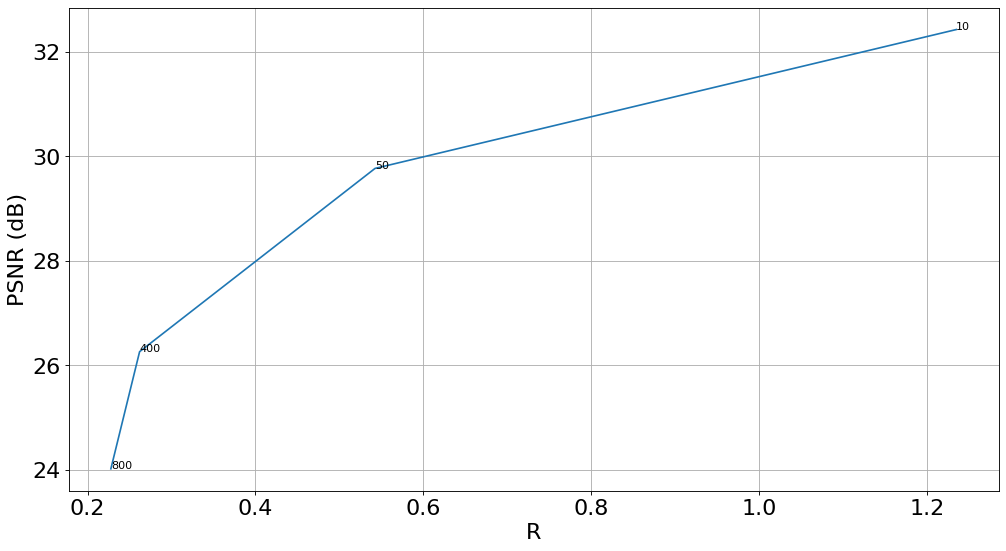

In [148]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)


plt.plot(Rs, PSNRs)
for i in range(0, len(lambdas)):
    plt.text(Rs[i],PSNRs[i],  lambdas[i])
plt.xlabel("R", fontsize=20)
plt.ylabel("PSNR (dB)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.show()

In [149]:
print(Rs)
print(PSNRs)

[0.227813720703125, 0.26202392578125, 0.5423583984375, 1.2344970703125]
[24.018852735021447, 26.259952590746877, 29.766297504803887, 32.42319512469878]


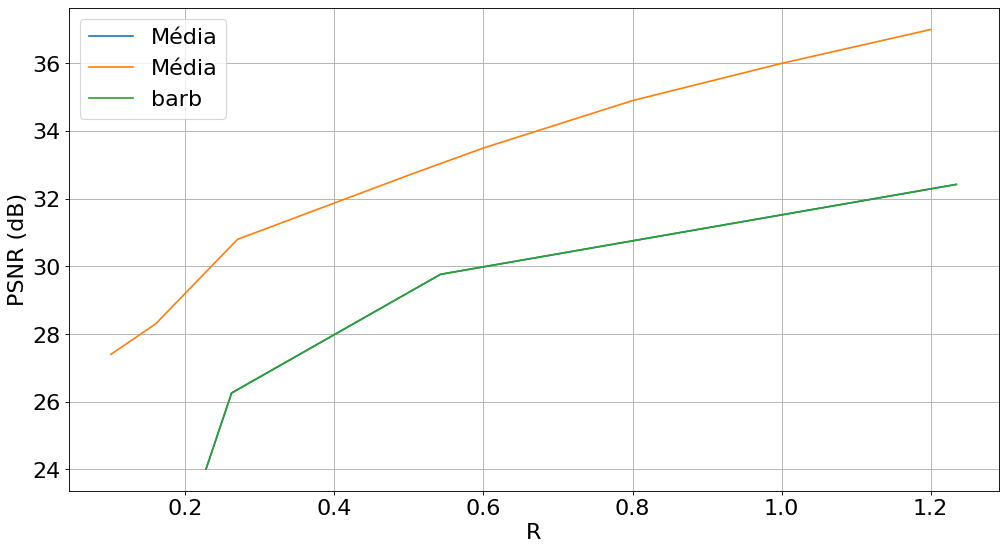

In [150]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)

imagens = ["barb", "cameraman", "gold", "lena", "pp1205"]
# imagens = ["barb", "gold", "lena", "pp1205"]


gabarito = np.array([[27.4, 0.1], [28.3, 0.16], [30.8, 0.27], [32.7, 0.5], [33.5, 0.6], [34.9, 0.8], [36, 1.0], [37, 1.2]])

plt.plot(Rs, PSNRs, label="Média")
plt.plot(gabarito[:, 1], gabarito[:, 0], label="Média")
# for j in range(0, len(lambdas)):
#     plt.text(Rs[j],PSNRs[j],  lambdas[j], fontsize=20)

for i in range(0, len(testimgs)):
    plt.plot(AllRs[:, i], AllPSNR[:, i], label=imagens[i])
#     for j in range(0, len(lambdas)):
# #         if(AllRs[j, i] <= 4):
#         plt.text(AllRs[j, i],AllPSNR[j, i],  lambdas[j], fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("R", fontsize=20)
plt.ylabel("PSNR (dB)", fontsize=20)
plt.legend(fontsize=20)
# plt.xlim([0, 4])
plt.grid()
# plt.savefig('resultados.eps')
plt.show()